<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part One: Data Input </h2>	


<h3>  Import Statements </h3>	


In [1]:
#Import anything you need here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
import os


## Additional imports from me
import zipfile


20_categories_training/20_categories_training/airplanes/airplanes_0001.jpg <class 'str'>


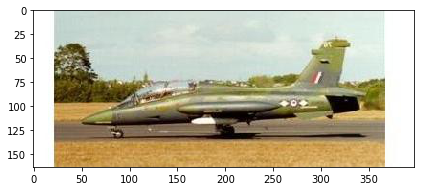

,Pictures,Encoding
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1


In [48]:
#Example of reading in a file


# filename = os.path.join(skimage.data_dir, 'd.jpg')
filename= '20_categories_training/20_categories_training/airplanes/airplanes_0001.jpg'
print(filename, type(filename))
dog = io.imread(filename)
skimage.io.imshow(dog)

plt.show()

example_data_frame=pd.DataFrame()
example_data_frame['Pictures']=[dog]
example_data_frame['Encoding']=[1]
example_data_frame

# Importing Data Files

The learning set consists of a total of 2,921 images, of 20 different types and of possibly different sizes (i.e.,
numbers of pixels). 

Each image is represented as 3-d array with 
* the first two dimensions corresponding to the row and column pixels
* third dimension corresponds to the color. 
    * The third dimension size is always 3, and each value corresponds to a red, green, or blue (RGB) color intensity between 0 and 28 − 1.


<h4> Using the code for reference, take the given folder and create a dataframe with the picture object, and the encoding as listed below. </h4>	
0=Airplanes, 1=Bear, 2=Blimp, 3=Comet, 4=Crab, 5=Dog, 6=Dolphin, 7=Giraffe, 8=Goat, 9=Gorilla, 10=Kangaroo, 11=Killer-Whale, 12=Leopards, 13=Llama, 14= Penguin, 15= Porcupine, 16=Teddy-Bear, 17=Triceratops, 18=Unicorn, 19=Zebra

In [49]:
def extract_zip_file(zip_file_name):
    # opening the zip file in READ mode 
    with zipfile.ZipFile(zip_file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall() 
        print('Done!') 

def create_encoding(info_list):
    inc = 0 
    encoding = {}
    for info in info_list:
        if info.is_dir():
            if len(info.filename) > 47:
                encoding[info.filename[46:-1]] = inc
                print(info.filename[46:-1], "\t\t\t is mapped to ", inc)
                inc +=1
    print('ENCODING FINISHED MAPPING\n\n')
    return encoding

In [50]:

def read_organize_data(file_path):
    #Fill this function out, should return a dataframe with picture object, and correct encoding
    
    images = []
    encode = []
    file_zip = zipfile.ZipFile(file_path)
    encoding = create_encoding(zipfile.ZipFile(file_path).infolist())
    
    print(encoding)
    with zipfile.ZipFile(file_path) as file_zip:
        for info in file_zip.infolist():
            ## ensure we are not looking at directories and only files
            if not info.is_dir() and '._' not in info.filename:
                ## only view jpg files
                if '.jpg' in info.filename or 'JPG' in info.filename:
                    ## Find the encoding encoding mapping
                    for code in encoding.keys():
                        if code in info.filename: ## find the corresponding encoding
                            fn = info.filename
                            print("Attempting to read: \n\t", fn)
                            img = skimage.io.imread(fn)
                            coded_num = encoding[code]
#                             skimage.io.imshow(img)
#                             plt.show()
                            
                            ## append to list used to build df
                            images.append(img)
                            encode.append(coded_num)
    print("DONE ORGANIZING...")
                            
    created_df = pd.DataFrame()
    created_df['Pictures'] = images
    created_df['Encoding'] = encode
    return created_df

def read_test_data(file_path):
    images = []
    file_zip = zipfile.ZipFile(file_path)
    
    with zipfile.ZipFile(file_path) as file_zip:
        for info in file_zip.infolist():
            ## ensure we are not looking at directories and only files
            if not info.is_dir() and '._' not in info.filename:
                ## only view jpg files
                if '.jpg' in info.filename or 'JPG' in info.filename:
                    fn = info.filename
                    print("Attempting to read: \n\t", fn)
                    img = skimage.io.imread(fn)
#                             skimage.io.imshow(img)
#                             plt.show()

                    ## append to list used to build df
                    images.append(img)
    print("DONE ORGANIZING...")
                            
    created_df = pd.DataFrame()
    created_df['Pictures'] = images
    return created_df



## Training Data

In [29]:
training_zip_path = '20_categories_training.zip'

## Extract all the images from the training file
extract_zip_file(training_zip_path)


File Name                                             Modified             Size
20_categories_training/20_categories_training/ 2019-04-17 12:12:18            0
20_categories_training/20_categories_training/._.DS_Store 2012-02-16 13:05:18           82
20_categories_training/20_categories_training/.DS_Store 2012-02-16 13:05:18        15364
20_categories_training/20_categories_training/airplanes/ 2019-04-17 12:18:42            0
20_categories_training/20_categories_training/airplanes/._airplanes_0001.jpg 2006-04-23 22:37:06          170
20_categories_training/20_categories_training/airplanes/._airplanes_0002.jpg 2004-11-08 23:29:06          170
20_categories_training/20_categories_training/airplanes/._airplanes_0003.jpg 2004-11-08 23:29:06          170
20_categories_training/20_categories_training/airplanes/._airplanes_0004.jpg 2006-04-23 22:37:10          170
20_categories_training/20_categories_training/airplanes/._airplanes_0005.jpg 2006-04-23 22:37:06          170
20_categories_traini

20_categories_training/20_categories_training/leopards/._leopards_0043.jpg 2006-01-10 01:28:12          170
20_categories_training/20_categories_training/leopards/._leopards_0044.jpg 2006-02-18 17:49:56          170
20_categories_training/20_categories_training/leopards/._leopards_0045.jpg 2006-01-10 01:28:10          170
20_categories_training/20_categories_training/leopards/._leopards_0046.jpg 2006-01-10 01:28:10          170
20_categories_training/20_categories_training/leopards/._leopards_0047.jpg 2006-01-10 01:28:10          170
20_categories_training/20_categories_training/leopards/._leopards_0048.jpg 2006-02-18 17:50:00          170
20_categories_training/20_categories_training/leopards/._leopards_0049.jpg 2006-01-10 01:28:12          170
20_categories_training/20_categories_training/leopards/._leopards_0050.jpg 2006-02-18 17:49:56          170
20_categories_training/20_categories_training/leopards/._leopards_0051.jpg 2006-01-10 01:28:12          170
20_categories_training/20_ca

Done!


In [30]:
## Create the encoded dataframe 
training_pd = read_organize_data(training_zip_path)


airplanes 			 is mapped to  0
bear 			 is mapped to  1
blimp 			 is mapped to  2
comet 			 is mapped to  3
crab 			 is mapped to  4
dog 			 is mapped to  5
dolphin 			 is mapped to  6
giraffe 			 is mapped to  7
goat 			 is mapped to  8
gorilla 			 is mapped to  9
kangaroo 			 is mapped to  10
killer-whale 			 is mapped to  11
leopards 			 is mapped to  12
llama 			 is mapped to  13
penguin 			 is mapped to  14
porcupine 			 is mapped to  15
teddy-bear 			 is mapped to  16
triceratops 			 is mapped to  17
unicorn 			 is mapped to  18
zebra 			 is mapped to  19
ENCODING FINISHED MAPPING


{'airplanes': 0, 'bear': 1, 'blimp': 2, 'comet': 3, 'crab': 4, 'dog': 5, 'dolphin': 6, 'giraffe': 7, 'goat': 8, 'gorilla': 9, 'kangaroo': 10, 'killer-whale': 11, 'leopards': 12, 'llama': 13, 'penguin': 14, 'porcupine': 15, 'teddy-bear': 16, 'triceratops': 17, 'unicorn': 18, 'zebra': 19}
Attempting to read: 
	 20_categories_training/20_categories_training/airplanes/airplanes_0001.jpg
Attempting to read:

Attempting to read: 
	 20_categories_training/20_categories_training/bear/bear_0017.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/bear/bear_0018.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/bear/bear_0019.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/bear/bear_0020.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/bear/bear_0021.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/bear/bear_0022.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/bear/bear_0023.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/bear/bear_0024.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/bear/bear_0025.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/bear/bear_0026.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/bear/bear_0027.jpg
Attempting to read: 
	 20_catego

	 20_categories_training/20_categories_training/comet/comet_0024.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/comet/comet_0025.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/comet/comet_0026.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/comet/comet_0027.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/comet/comet_0028.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/comet/comet_0029.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/comet/comet_0030.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/comet/comet_0031.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/comet/comet_0032.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/comet/comet_0033.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/comet/comet_0034.jpg
Attempting to read: 
	 20_categ

Attempting to read: 
	 20_categories_training/20_categories_training/dog/dog_0050.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/dog/dog_0051.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/dog/dog_0052.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/dog/dog_0053.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/dog/dog_0054.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/dog/dog_0055.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/dog/dog_0056.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/dog/dog_0057.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/dog/dog_0058.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/dog/dog_0059.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/dog/dog_0060.jpg
Attempting to read: 
	 20_categories_training/20_categ

Attempting to read: 
	 20_categories_training/20_categories_training/giraffe/giraffe_0046.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/giraffe/giraffe_0047.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/giraffe/giraffe_0048.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/giraffe/giraffe_0049.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/giraffe/giraffe_0050.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/giraffe/giraffe_0051.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/giraffe/giraffe_0052.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/giraffe/giraffe_0053.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/giraffe/giraffe_0054.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/giraffe/giraffe_0055.jpg
Attempting to read: 
	 20_categories_training/20_categories_

Attempting to read: 
	 20_categories_training/20_categories_training/gorilla/gorilla_0057.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/gorilla/gorilla_0058.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/gorilla/gorilla_0059.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/gorilla/gorilla_0060.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/gorilla/gorilla_0061.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/gorilla/gorilla_0062.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/gorilla/gorilla_0063.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/gorilla/gorilla_0064.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/gorilla/gorilla_0065.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/gorilla/gorilla_0066.jpg
Attempting to read: 
	 20_categories_training/20_categories_

Attempting to read: 
	 20_categories_training/20_categories_training/killer-whale/killer-whale_0007.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/killer-whale/killer-whale_0008.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/killer-whale/killer-whale_0009.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/killer-whale/killer-whale_0010.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/killer-whale/killer-whale_0011.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/killer-whale/killer-whale_0012.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/killer-whale/killer-whale_0013.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/killer-whale/killer-whale_0014.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/killer-whale/killer-whale_0015.jpg
Attempting to read: 
	 20_categories_training/20_categories_trai

Attempting to read: 
	 20_categories_training/20_categories_training/leopards/leopards_0125.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/leopards/leopards_0126.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/leopards/leopards_0127.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/llama/llama_0001.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/llama/llama_0002.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/llama/llama_0003.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/llama/llama_0004.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/llama/llama_0005.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/llama/llama_0006.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/llama/llama_0007.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/llama/llama_0

Attempting to read: 
	 20_categories_training/20_categories_training/penguin/penguin_0022.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/penguin/penguin_0023.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/penguin/penguin_0024.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/penguin/penguin_0025.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/penguin/penguin_0026.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/penguin/penguin_0027.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/penguin/penguin_0028.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/penguin/penguin_0029.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/penguin/penguin_0030.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/penguin/penguin_0031.jpg
Attempting to read: 
	 20_categories_training/20_categories_

Attempting to read: 
	 20_categories_training/20_categories_training/porcupine/porcupine_0026.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/porcupine/porcupine_0027.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/porcupine/porcupine_0028.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/porcupine/porcupine_0029.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/porcupine/porcupine_0030.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/porcupine/porcupine_0031.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/porcupine/porcupine_0032.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/porcupine/porcupine_0033.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/porcupine/porcupine_0034.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/porcupine/porcupine_0035.jpg
Attempting to read: 

Attempting to read: 
	 20_categories_training/20_categories_training/teddy-bear/teddy-bear_0031.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/teddy-bear/teddy-bear_0032.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/teddy-bear/teddy-bear_0032.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/teddy-bear/teddy-bear_0033.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/teddy-bear/teddy-bear_0033.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/teddy-bear/teddy-bear_0034.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/teddy-bear/teddy-bear_0034.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/teddy-bear/teddy-bear_0035.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/teddy-bear/teddy-bear_0035.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/teddy-bear/teddy-bear_0036.jpg


Attempting to read: 
	 20_categories_training/20_categories_training/triceratops/triceratops_0031.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/triceratops/triceratops_0032.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/triceratops/triceratops_0033.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/triceratops/triceratops_0034.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/triceratops/triceratops_0035.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/triceratops/triceratops_0036.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/triceratops/triceratops_0037.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/triceratops/triceratops_0038.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/triceratops/triceratops_0039.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/triceratops/t

Attempting to read: 
	 20_categories_training/20_categories_training/unicorn/unicorn_0054.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/unicorn/unicorn_0055.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/unicorn/unicorn_0056.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/unicorn/unicorn_0057.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/unicorn/unicorn_0058.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/unicorn/unicorn_0059.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/unicorn/unicorn_0060.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/unicorn/unicorn_0061.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/unicorn/unicorn_0062.jpg
Attempting to read: 
	 20_categories_training/20_categories_training/unicorn/unicorn_0063.jpg
Attempting to read: 
	 20_categories_training/20_categories_

In [45]:
## write to a csv file
# display(training_pd) # DISPLAYING TAKES A LONG TIME
training_pd.to_csv('data/training_images.csv')


## Testing Data

In [41]:
testing_zip_path = '20_Validation.zip'

## Extract all the images from the training file
extract_zip_file(testing_zip_path)

In [42]:
## Create the testing picture data frame
testing_pd = read_test_data(testing_zip_path)


Attempting to read: 
	 20_Validation/validation_pic (1).jpg
Attempting to read: 
	 20_Validation/validation_pic (10).jpg
Attempting to read: 
	 20_Validation/validation_pic (100).jpg
Attempting to read: 
	 20_Validation/validation_pic (101).jpg
Attempting to read: 
	 20_Validation/validation_pic (102).jpg
Attempting to read: 
	 20_Validation/validation_pic (103).jpg
Attempting to read: 
	 20_Validation/validation_pic (104).jpg
Attempting to read: 
	 20_Validation/validation_pic (105).jpg
Attempting to read: 
	 20_Validation/validation_pic (106).jpg
Attempting to read: 
	 20_Validation/validation_pic (107).jpg
Attempting to read: 
	 20_Validation/validation_pic (108).jpg
Attempting to read: 
	 20_Validation/validation_pic (109).jpg
Attempting to read: 
	 20_Validation/validation_pic (11).jpg
Attempting to read: 
	 20_Validation/validation_pic (110).jpg
Attempting to read: 
	 20_Validation/validation_pic (111).jpg
Attempting to read: 
	 20_Validation/validation_pic (112).jpg
Attempting t

Attempting to read: 
	 20_Validation/validation_pic (249).jpg
Attempting to read: 
	 20_Validation/validation_pic (25).jpg
Attempting to read: 
	 20_Validation/validation_pic (250).jpg
Attempting to read: 
	 20_Validation/validation_pic (251).jpg
Attempting to read: 
	 20_Validation/validation_pic (252).jpg
Attempting to read: 
	 20_Validation/validation_pic (253).jpg
Attempting to read: 
	 20_Validation/validation_pic (254).jpg
Attempting to read: 
	 20_Validation/validation_pic (255).jpg
Attempting to read: 
	 20_Validation/validation_pic (256).jpg
Attempting to read: 
	 20_Validation/validation_pic (257).jpg
Attempting to read: 
	 20_Validation/validation_pic (258).jpg
Attempting to read: 
	 20_Validation/validation_pic (259).jpg
Attempting to read: 
	 20_Validation/validation_pic (26).jpg
Attempting to read: 
	 20_Validation/validation_pic (260).jpg
Attempting to read: 
	 20_Validation/validation_pic (261).jpg
Attempting to read: 
	 20_Validation/validation_pic (262).jpg
Attempting

Attempting to read: 
	 20_Validation/validation_pic (382).jpg
Attempting to read: 
	 20_Validation/validation_pic (383).jpg
Attempting to read: 
	 20_Validation/validation_pic (384).jpg
Attempting to read: 
	 20_Validation/validation_pic (385).jpg
Attempting to read: 
	 20_Validation/validation_pic (386).jpg
Attempting to read: 
	 20_Validation/validation_pic (387).jpg
Attempting to read: 
	 20_Validation/validation_pic (388).jpg
Attempting to read: 
	 20_Validation/validation_pic (389).jpg
Attempting to read: 
	 20_Validation/validation_pic (39).jpg
Attempting to read: 
	 20_Validation/validation_pic (390).jpg
Attempting to read: 
	 20_Validation/validation_pic (391).jpg
Attempting to read: 
	 20_Validation/validation_pic (392).jpg
Attempting to read: 
	 20_Validation/validation_pic (393).jpg
Attempting to read: 
	 20_Validation/validation_pic (394).jpg
Attempting to read: 
	 20_Validation/validation_pic (395).jpg
Attempting to read: 
	 20_Validation/validation_pic (396).jpg
Attemptin

Attempting to read: 
	 20_Validation/validation_pic (554).jpg
Attempting to read: 
	 20_Validation/validation_pic (555).jpg
Attempting to read: 
	 20_Validation/validation_pic (556).jpg
Attempting to read: 
	 20_Validation/validation_pic (557).jpg
Attempting to read: 
	 20_Validation/validation_pic (558).jpg
Attempting to read: 
	 20_Validation/validation_pic (559).jpg
Attempting to read: 
	 20_Validation/validation_pic (56).jpg
Attempting to read: 
	 20_Validation/validation_pic (560).jpg
Attempting to read: 
	 20_Validation/validation_pic (561).jpg
Attempting to read: 
	 20_Validation/validation_pic (562).jpg
Attempting to read: 
	 20_Validation/validation_pic (563).jpg
Attempting to read: 
	 20_Validation/validation_pic (564).jpg
Attempting to read: 
	 20_Validation/validation_pic (565).jpg
Attempting to read: 
	 20_Validation/validation_pic (566).jpg
Attempting to read: 
	 20_Validation/validation_pic (567).jpg
Attempting to read: 
	 20_Validation/validation_pic (568).jpg
Attemptin

Attempting to read: 
	 20_Validation/validation_pic (7).jpg
Attempting to read: 
	 20_Validation/validation_pic (70).jpg
Attempting to read: 
	 20_Validation/validation_pic (700).jpg
Attempting to read: 
	 20_Validation/validation_pic (701).jpg
Attempting to read: 
	 20_Validation/validation_pic (702).jpg
Attempting to read: 
	 20_Validation/validation_pic (703).jpg
Attempting to read: 
	 20_Validation/validation_pic (704).jpg
Attempting to read: 
	 20_Validation/validation_pic (705).jpg
Attempting to read: 
	 20_Validation/validation_pic (706).jpg
Attempting to read: 
	 20_Validation/validation_pic (707).jpg
Attempting to read: 
	 20_Validation/validation_pic (708).jpg
Attempting to read: 
	 20_Validation/validation_pic (709).jpg
Attempting to read: 
	 20_Validation/validation_pic (71).jpg
Attempting to read: 
	 20_Validation/validation_pic (710).jpg
Attempting to read: 
	 20_Validation/validation_pic (711).jpg
Attempting to read: 
	 20_Validation/validation_pic (712).jpg
Attempting t

,Pictures
0,"[[[48, 53, 57], [52, 57, 63], [54, 59, 65], [4..."
1,"[[[213, 173, 85], [213, 173, 85], [213, 173, 8..."
2,"[[[19, 36, 30], [14, 31, 25], [11, 26, 21], [1..."
3,"[[[95, 138, 69], [95, 138, 69], [95, 138, 69],..."
4,"[[[162, 204, 242], [164, 203, 242], [164, 203,..."
5,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6,"[[[234, 225, 230], [244, 235, 238], [230, 221,..."
7,"[[[62, 54, 65], [57, 55, 60], [57, 59, 56], [5..."
8,"[[[181, 154, 124], [182, 155, 125], [183, 157,..."
9,"[[[216, 208, 205], [229, 221, 218], [231, 226,..."


In [47]:
# write to csv file 
# display(testing_pd)  # DISPLAYING TAKES A LONG TIME
testing_pd.to_csv('data/testing_images.csv')
